In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import optuna

In [12]:
df = pd.read_csv('0918_umap_one_hot.csv')
df_normalized = pd.read_csv('0916 착과수 최종 normalized.csv')

### 시기를 기준으로 데이터 셋 나누기

In [17]:
df1 = df_normalized.iloc[0:3600,:]
df1

,STRG_DT,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD
0,2022-01-01 0:00,0.278421,0.084880,0.914160,0.067609,-3.475634,0.348886,-0.801951,0.109357
1,2022-01-01 0:10,0.278421,0.120558,1.869452,0.067609,-3.425997,0.348886,-0.801951,0.109357
2,2022-01-01 0:20,0.278421,0.227592,1.522073,0.067609,-3.392906,0.229860,-0.801951,0.109357
3,2022-01-01 0:30,0.278421,0.203807,1.348384,0.067609,-3.409452,0.309210,-0.801951,0.109357
4,2022-01-01 0:40,0.278421,0.215699,1.319436,0.067609,-3.459089,0.553875,-0.801951,0.109357
...,...,...,...,...,...,...,...,...,...
3595,2022-01-25 23:10,0.758824,2.273133,-0.562199,0.815623,0.214058,-0.371883,-0.401030,-0.525355
3596,2022-01-25 23:20,0.758824,2.296918,-0.591147,0.815623,0.197512,-0.259470,-0.401030,-0.525355
3597,2022-01-25 23:30,0.758824,2.249348,-0.591147,0.815623,0.677338,-0.418171,-0.401030,-0.525355
3598,2022-01-25 23:40,0.758824,2.249348,-0.591147,0.770742,0.412607,-0.517360,-0.401030,-0.525355


In [18]:
index2 = df[df['cluster_2']==1].index
df2 = df_normalized.iloc[index2]
df2

,STRG_DT,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD
3600,2022-01-26 0:00,0.758824,2.285026,-0.634570,0.695941,0.495335,-0.550423,-0.601491,0.932132
3601,2022-01-26 0:10,0.758824,2.296918,-0.677992,0.666020,0.660792,-0.497522,-0.601491,0.932132
3602,2022-01-26 0:20,0.758824,2.273133,-0.677992,0.621139,0.396061,-0.530585,-0.601491,0.932132
3603,2022-01-26 0:30,0.758824,2.285026,-0.692466,0.591219,0.280241,-0.338821,-0.601491,0.932132
3604,2022-01-26 0:40,0.758824,2.285026,-0.721414,0.546338,0.214058,-0.206569,-0.601491,0.932132
...,...,...,...,...,...,...,...,...,...
20011,2022-05-19 23:10,-1.499068,-0.307578,-0.301665,-0.530802,-0.034127,-1.687783,0.801733,-0.243261
20012,2022-05-19 23:20,-1.499068,-0.378934,-0.316139,-0.530802,-0.034127,-1.641495,0.801733,-0.243261
20013,2022-05-19 23:30,-1.499068,-0.378934,-0.330613,-0.530802,-0.050673,-1.595207,0.801733,-0.243261
20014,2022-05-19 23:40,-1.499068,-0.355149,-0.388510,-0.530802,-0.067219,-1.641495,0.801733,-0.243261


In [20]:
df3 = df_normalized.iloc[20016:,:]
df3

,STRG_DT,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD
20016,2022-05-20 0:00,-1.499068,-0.248115,-0.562199,-0.530802,-0.166493,-1.423280,0.801733,-0.548863
20017,2022-05-20 0:10,-1.499068,-0.176759,-0.634570,-0.530802,-0.166493,-1.317480,0.801733,-0.548863
20018,2022-05-20 0:20,-1.499068,-0.105403,-0.677992,-0.530802,-0.149947,-1.145553,0.801733,-0.548863
20019,2022-05-20 0:30,-1.499068,-0.105403,-0.677992,-0.530802,-0.116856,-1.224904,0.801733,-0.548863
20020,2022-05-20 0:40,-1.499068,-0.129188,-0.649044,-0.530802,-0.067219,-1.317480,0.200351,-0.548863
...,...,...,...,...,...,...,...,...,...
26059,2022-06-30 23:10,-1.451028,-0.331364,0.190455,-1.278816,-0.232676,0.289373,0.801733,-0.877973
26060,2022-06-30 23:20,-1.451028,-0.331364,0.190455,-1.278816,-0.232676,0.315823,0.801733,-0.877973
26061,2022-06-30 23:30,-1.451028,-0.307578,0.204929,-1.278816,-0.232676,0.335660,0.801733,-0.877973
26062,2022-06-30 23:40,-1.451028,-0.260008,0.190455,-1.278816,-0.232676,0.362111,0.801733,-0.877973


In [21]:
X_1 = df1.iloc[:, 2:]
y_1 = df1.iloc[:,1]

X_2 = df2.iloc[:, 2:]
y_2 = df2.iloc[:,1]

X_3 = df3.iloc[:, 2:]
y_3 = df3.iloc[:,1]

In [22]:
# 다중선형회귀 모델 생성 및 적합
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

model_2 = LinearRegression()
model_2.fit(X_2, y_2)

model_3 = LinearRegression()
model_3.fit(X_3, y_3)

LinearRegression()

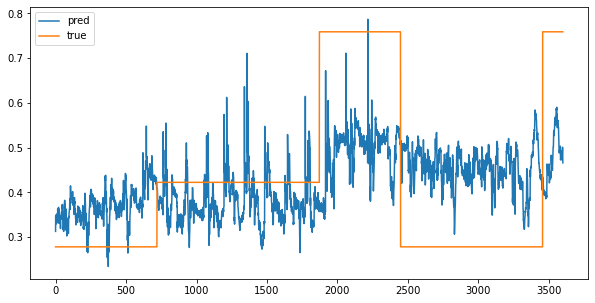

[ 0.01867139  0.03319381  0.0249673   0.05416967  0.09362948  0.00950192
 -0.03447213]
0.4463815058770925


In [25]:
y_pred_1 = model_1.predict(X_1)

plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_1),label = "pred")
plt.plot(np.array(y_1),label = "true")
plt.legend()
plt.show()

coefficients = model_1.coef_
intercept = model_1.intercept_

print(coefficients)
print(intercept)

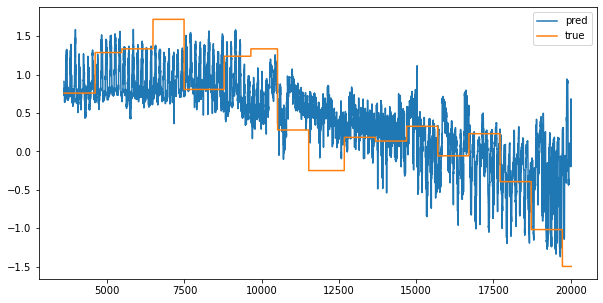

[ 0.06613736 -0.07034148  0.13378498  0.0246664  -0.23094826 -0.31070011
 -0.16265781]
0.4465796796447394


In [29]:
y_pred_2 = model_2.predict(X_2)

plt.figure(figsize=(10,5))
x_values = np.arange(3600, 20016) 
plt.plot(x_values, np.array(y_pred_2), label="pred")
plt.plot(x_values, np.array(y_2), label="true")
plt.legend()
plt.show()

coefficients = model_2.coef_
intercept = model_2.intercept_

print(coefficients)
print(intercept)

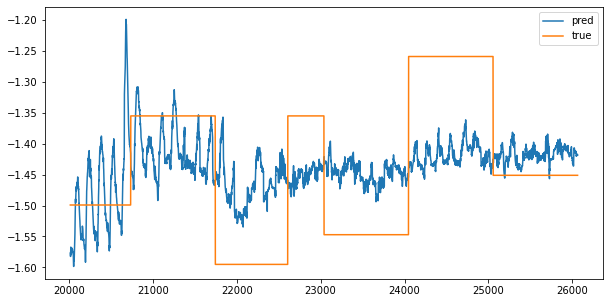

[-0.0060747   0.06271112 -0.1266701   0.00563716  0.01205467 -0.00785674
  0.0128269 ]
-1.5788784543228114


In [30]:
y_pred_3 = model_3.predict(X_3)

plt.figure(figsize=(10,5))
x_values = np.arange(20016, 26064) 
plt.plot(x_values, np.array(y_pred_3), label="pred")
plt.plot(x_values, np.array(y_3), label="true")
plt.legend()
plt.show()

coefficients = model_3.coef_
intercept = model_3.intercept_

print(coefficients)
print(intercept)

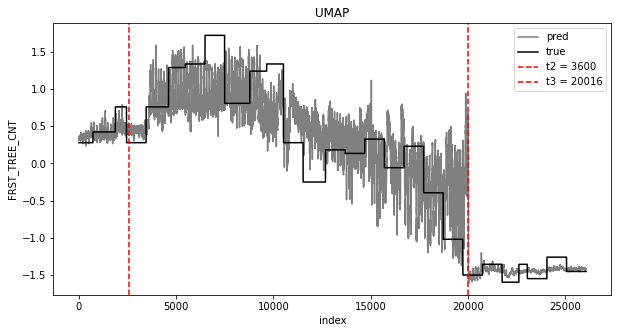

In [31]:
y_pred_1 = model_1.predict(X_1)
y_pred_2 = model_2.predict(X_2)
y_pred_3 = model_3.predict(X_3)

y_pred_df1 = pd.DataFrame({'FRST_TREE_CNT': y_pred_1})
y_pred_df2 = pd.DataFrame({'FRST_TREE_CNT': y_pred_2})
y_pred_df3 = pd.DataFrame({'FRST_TREE_CNT': y_pred_3})
combined_y_pred = pd.concat([y_pred_df1, y_pred_df2, y_pred_df3], ignore_index=True)

y_1_df = pd.DataFrame({'FRST_TREE_CNT': y_1})
y_2_df = pd.DataFrame({'FRST_TREE_CNT': y_2})
y_3_df = pd.DataFrame({'FRST_TREE_CNT': y_3})
combined_y = pd.concat([y_1_df, y_2_df, y_3_df], ignore_index=True)

plt.figure(figsize=(10,5))
plt.plot(np.array(combined_y_pred),label = "pred", color = 'gray')
plt.plot(np.array(combined_y),label = "true", color = 'black')
plt.axvline(x=2600, color='r', linestyle='--', label='t2 = 3600')
plt.axvline(x=20016, color='r', linestyle='--', label='t3 = 20016')
plt.xlabel('index')  # x축 이름 설정
plt.ylabel('FRST_TREE_CNT')  # y축 이름 설정
plt.title('UMAP')  # 그래프 제목 설정
plt.legend()
plt.show()